$Aprendizaje\ de\ Máquina\\
Parcial\ 1\\ 
19\ de\ Abril\ de\ 2021\\
Profesor:\ Francisco\ Gomez\\
Estudiante:\ Carlos\ Ernesto\ Isaza\ Cavajal$

### EJERCICIO 1 (Modelar EXOR)

El modelo M-P de una nurona es de la siguiente manera.
<img src="imagenes/modeloMP.PNG"
 width="200" height = "200">



Donde $x_{i},y \in \{0,1\}$ para $1\leq i\leq n$. Se define $g(x_{1}...x_{n})=\sum_{i=1}^{n}x_{i}$ y,


$$f(g(x_{1}...x_{n})=\left\lbrace\begin{array}{c} 1~si~g(x_{1}...x_{n})\geq \theta \\ 0~otro~caso \end{array}\right.$$
con $\theta \in \mathcal N$.

Utilice este modelo para modelar XOR:
<img src="imagenes/XOR.PNG"
 width="200" height = "200">


### SOLUCIÓN


Note que el XOR es equivalente a un O exclusivo, el cual es equivalente la negación del si solo si. Entonces podemos usar las reglas de la lógica proposicional para llevar ésta última a una forma normal disyuntiva:
$$\lnot(x_{1}\leftrightarrow x_{2}),$$
$$\lnot((\lnot x_{1}\lor x_{2})\land(\lnot x_{2}\lor x_{1})),$$
$$((x_{1}\land \lnot x_{2})\lor(\lnot x_{2}\land \lnot x_{1})).$$

Un primer esquema del modelo puede ser el siguiente:
<img src="imagenes/MPXOR1.PNG"
 width="500" height = "500">

Para no utilizar "$\lnot$" en la red, podemos definir la siguiente función,
$$\bar{f}(g(x_{1}...x_{n})=\left\lbrace\begin{array}{c} 1~si~g(x_{1}...x_{n})< \theta \\ 0~otro~caso \end{array}\right.$$

Quedando nuestro modelo de la siguiente forma:
<img src="imagenes/MPXOR2.PNG"
 width="500" height = "500">

### EJERCICIO 2 (Análisis $\frac{||\theta^{*}||^{2}}{\gamma^{2}}$)

Sea $\{(x_{1},y_{1})...(x_{n},y_{n})\}$ los datos de entrenamiento. En el análisis de convergencia del modelo del Percertrón se llegó a que $$\frac{\gamma\sqrt{k}}{||\theta^{*}||R}\leq \cos{(\theta^{*},\theta^{k})}\leq1,$$ 
(identifiquemos este resutadao con (#)).
Donde  $k$ es la k-iésima iteración del algorimo, $\theta^{*}$ es el vector de pesos óptimo, $\theta^{k}$ es el vector de pesos encontrado en la  k-iésima iteración, $\gamma$ es un real positivo tal que $y_{t}\theta^{*}\cdot x_{t}\geq\gamma$ para todo $t$ y $R$ es un numero real positivo tal que $||x_{t}||\leq R$ para todo $t$.

Indique cómo es y qué significa la cantidad $\frac{||\theta^{*}||^{2}}{\gamma^{2}}$ en terminos del aprendizaje del algoritmo.

### SOLUCIÓN

En el algoritmo del Percertron queremos que $\theta^{k}\approx\theta^{*}$, entonces queremos que el ángulo entre ellos tienda a cero, es decir que $\cos{(\theta^{*},\theta^{k})}\approx 1$, o lo que es equivlente a que $\frac{1}{\cos{(\theta^{*},\theta^{k})^{2}}}\approx 1$. Note que de (#) obtenemos 

$$1\leq \frac{1}{\cos{(\theta^{*},\theta^{k})^{2}}}\leq \frac{||\theta^{*}||^{2}}{\gamma^{2}}\frac{R^{2}}{k}. $$

Supongamos que  $\frac{||\theta^{*}||^{2}}{\gamma^{2}}<1$, $0<||\theta^{*}||^{2}<\gamma^{2}$, entonces en algunos casos "el aprendizaje" no es factible. Por ejemplo con $1<R^{2}\leq ||\theta^{*}||^{2}$, si $k=1$ tendriamos $1\leq \frac{1}{\cos{(\theta^{*},\theta^{k})^{2}}}\leq \frac{||\theta^{*}||^{2}}{\gamma^{2}}\frac{R^{2}}{k}<1$ lo cual es una contradicción.


Supongamos $\frac{||\theta^{*}||^{2}}{\gamma^{2}}>1$, $0<\gamma^{2}<||\theta^{*}||^{2}$, entonces "el aprendizaje" es factible para todos los valores de $1<R^2$; pero con $\gamma^{2}<<||\theta^{*}||^{2}$, $\frac{1}{\cos{(\theta^{*},\theta^{k})^{2}}}$ potencialmente sería muy grande es decir que el ángulo entre $\theta^{*}$ y  $\theta^{1}$ sería muy grande y habría que hacer muchas iteraciones para reducir dicho ángulo a casi cero. 

De lo anterior concluimos que  $\frac{||\theta^{*}||^{2}}{\gamma^{2}}\geq 1$ y cuando  $\frac{||\theta^{*}||^{2}}{\gamma^{2}}\approx1$ "el aprendizaje" es más rápido. 



### EJERCICIO 3 (Ejercicio 1.2 del libro)

Supongamos que usamos un perceptrón para detectar mensajes de spam. Digamos que cada mensaje de correo electrónico está representado por la frecuencia de aparición de palabras clave, y el resultado es $+1$ si el mensaje se considera spam. 

(a) ¿Puede pensar en algunas palabras clave que terminarán con un gran peso positivo en el perceptrón? 

### SOLUCIÓN:

Supongamos que hay $n$ palabras clave. Dado $h\in \mathcal H$ ($\mathcal H$ el espacio de hipótesis) $h$ escoge un único vector de pesos $w\in  R^n$ y a cada vector de frecuencias de palabras clave $x\in R^{n}$ le asigna $+1$ o $-1$ de la siguiente manera:

$$h(x)=\left\lbrace\begin{array}{c} +1~si~w_{1}x_{1}+...+w_{n}x_{n}+b> 0 \\ -1 ~si~w_{1}x_{1}+...+w_{n}x_{n}+b < 0 \end{array}\right.$$

Donde $b$ es el lumbral para clasificar como spam o no. Como $h(x)=+1$ clasifica el mensaje caracterizado por $x$ como spam, entonces las "malas" palabras terminaran con un peso positivo. Algunas palabras "malas" son grocerias, gratis, ganador, rifa, compras, comprar, porno, sexo, credito entre otras.

(b) ¿Qué hay de las palabras clave que obtendrán un peso negativo?

### SOLUCIÓN:

En este caso como $h(x)=-1$ clasifica como no spam entoces la "buenas" palabras terminaran con un peso negativo. Algunas de esta palabras pueden ser oficina, casa, calle, cama, nombres de persona, sala, trabajo, escritorio, padres, familia, ciencia, articulo entre otras.

(c) ¿Qué parámetro del perceptrón afecta directamente a el número de mensajes que terminan siendo clasificados como spam?

### SOLUCIÓN:

El parametro es $b$. Observe que si $b<0$ los pesos positivos tendrán que tener un valor más grande para poder clasificar como spam, lo que disminuye la cantidad de mensajes clasificados como de este tipo; mientras que con un $b>0$ la cantidad aumentaría (comparadas con b=0).

### EJERCICIO 4 (Ejercicio 1.3 del libro)

Sea $w^{t}$ el vector de pesos obtenido en la t-ésima iteración del algoritmo del percetrón (aquí los vectores de pesos y los vectores de entrenamiento tienen a $b$ y a $1$ como primera coordenada, respectivamente). La regla de actualización de peso es la siguiente: si $y_{t}\neq sign(w^{t}\cdot x_{t})$, (donde $(x_{t},y_{t})$ son el t-ésimo elemento de los datos de entrenamiento), entonces $w^{t+1}=w^{t}+y_{t}x_{t}$, si $y_{t}= sign(w^{t}\cdot x_{t})$, $w^{t+1}=w^{t}$. Esta regla tiene la buena interpretación de que se mueve en la dirección de clasificar $x_{t}$ correctamente.

(a) Muestre que $y_{t}w^{t}\cdot x_{t}<0$. Pista: $x_{t}$ está mal clasificado por $w^{t}$

### SOLUCIÓN:

En general el producto de dos numeros reales $ab<0$ si y solo si tienen diferentes signos. Si $x_{t}$ está mal clasificado por $w^{k}$ entoces  $y_{t}\neq sign(w^{t}\cdot x_{t})$, luego  $y_{t}w^{k}\cdot x_{t}<0$

(b) Muestre que $y_{t}w^{t+1}\cdot x_{t}>y_{t}w^{t}\cdot x_{t}$ Pista: use la regla de actulización.

### SOLUCIÓN:

$y_{t}w^{t+1}\cdot x_{t}=y_{t}(w^{t}+y_{t}x_{t})\cdot x_{t}=y_{t}w^{t}\cdot x_{t}+y_{t}^{2}x_{t}\cdot x_{t}$. Como $y_{t}^{2}x_{t}\cdot x_{t}=y_{t}^{2}\frac{\cos{0}}{||x_{t}^{2}||}=\frac{1}{||x_{t}^{2}||}>0$, entonces $y_{t}w^{t+1}\cdot x_{t}>y_{t}w^{t}\cdot x_{t}$.

(c) En lo que respecta a la clasificación de $x_{t}$, argumente que el movimiento de $w^{t}$ a $w^{t+1}$ es un movimiento "en la dirección correcta". 

### SOLUCIÓN:

Supongamos que $x_{t}$ debe ser clasificado como positivo, es decir que $y_{t}=+1$ pero que $w^{t}\cdot x_{t}<0$, es decir que el $h$ asociado a $w^{t}$ tenga como resultado $h(x_{t})=-1$. El objetivo en la siguiente iteración es que, $w^{t+1}\cdot x_{t}$ se acerque más a cero o lo sobrepase y pace a cer negativo, es decir que $w^{t+1}\cdot x_{t}>w^{t}\cdot x_{t}$, lo cual esta garantizado por (b),  $y_{t}w^{t+1}\cdot x_{t}>y_{t}w^{t}\cdot x_{t}$.

Ahora supongamos que $x_{t}$ debe ser clasificado como negativo, es decir que $y_{t}=-1$ pero que $w^{t}\cdot x_{t}>0$, es decir que el $h$ asociado a $w^{t}$ tenga como resultado $h(x_{t})=+1$. En la siguiente iteración queremos que $w^{t+1}\cdot x_{t}$ se acerque a cero o que lo pase y sea menor que cero, es decir que $w^{t+1}\cdot x_{t}<w^{t}\cdot x_{t}$. Esta desiguldad es equivalente a $-1w^{t+1}\cdot x_{t}>-1w^{t}\cdot x_{t}$, lo cual nuevamente esta garantizado por (b),$y_{t}w^{t+1}\cdot x_{t}>y_{t}w^{t}\cdot x_{t}$.

Por tanto concluimos que la regla de actualización mueve $w^{t}$ a $w^{t+1}$ "en la dirección correcta". 





### EJERCICIO 5 (Ejercicio 1.10 del libro)

A continuación, se muestra un experimento que ilustra la diferencia entre un solo contenedor y varios contenedores. Ejecute una simulación por computadora para lanzar $1000$ monedas en perfecto estado.
Lanza cada moneda de forma independiente $10$ veces. Centrémonos en $3$ monedas de la siguiente manera: c_1 es la primera moneda lanzada; c_rand es una moneda que eliges al azar; c_min es la moneda que tuvo la frecuencia mínima de caras (si hay modedas con la misma frecuencia, elija, de entre estas, la que fue lanzada primero). Deje que v_1, v_rand y v_min sean la fracción de caras que obtenga por las tres monedas respectivas.

### SOLUCIÓN:

In [10]:
import numpy as np

#se define una funcion para lanzar una vez una cantidad determinada de monedas
def lanzaMonedas(numMonedas):
    #se crea un vector en el que cada casilla representa una moneda en el estado cara (1) o sello (0)
    monedas=[]
    #se crea un arreglo de numeros entre el intervalo [0,1) de tamaño numMonedas
    aleatoreos= np.random.uniform(low=0, high=1, size=numMonedas)
    #se llena el vector monedas con 1 o 0 
    for i in aleatoreos:
        if (i < 0.5):
            monedas.append(1)
        else:
            monedas.append(0)
        
    return monedas
    
#se define una funcion que calculas las fracciones v_1, v_rand y v_min
def frecuancias(numMonedas,numLanzamientos):
    #se crea un vector de tamaño numMonedas que contenera el numero total de caras de cada moneda
    totalCaras=np.zeros(numMonedas)
    #se elige al azar una moneda
    c_rand=np.random.choice(numMonedas)
    #se llena el arreglo totalCaras
    for _ in range(numLanzamientos):
        m=lanzaMonedas(numMonedas)
        totalCaras+=m
    #se calculan las fracciones de caras
    v_1=totalCaras[0]/numLanzamientos
    v_rand=totalCaras[c_rand]/numLanzamientos
    v_min=totalCaras[np.argmin(totalCaras)]/numLanzamientos   
    frec=[v_1,v_rand, v_min]
    return frec
        

In [47]:
numMonedas=10000
numLanzamientos=10
frec=frecuancias(numMonedas,numLanzamientos)

print(f"v_1 ={frec[0]}, v_rand={frec[1]}, v_min={frec[2]}")

v_1 =0.7, v_rand=0.9, v_min=0.0


(a) ¿Cuál es $\mu$ para las tres monedas seleccionadas?

### SOLUCIÓN:

Los posibles valores que puede tomar la variable alatoria son dos, cara y sello. Por experiencia es sabido que que lanzar una moneda al aire tiene una distribución uniforme, es decir que cada elemento de la variable aleatoria tiene la misma probabilidad de salir. Por tanto $\mu=0.5$

(b) Repita todo este experimento una gran cantidad de veces (por ejemplo, $100000$ ejecuciones de todo el experimento) para obtener varias instancias de v_1, v_rand y v_min y trazar los histogramas de las distribuciones de v_1, v_rand y v_min. Note que las monedas que terminan siendo c_rand y c_min pueden diferir de una ejecución a otra.

### SOLUCIÓN:

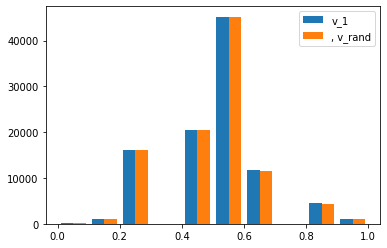

In [50]:
from matplotlib.pylab import hist, show
import matplotlib.pyplot as plt
#se crean 3 vectores para almacenar los resultados de los experiemtos
his_v1, his_vrand, his_vmin=[],[],[]
#se crea un ciclo para repetir el experimento varias veces
numExperimento=100000
for _ in range(numExperimento):
    frec=frecuancias(numMonedas,numLanzamientos)
    his_v1.append(frec[0])
    his_vrand.append(frec[1])
    his_vmin.append(frec[2])
#se sacan los histogramas y se grafican para v_1 y v_rand
a=his_v1
b=his_vrand
c=his_vmin
plt.hist([a, b], 10,(0,1), label=['v_1', ', v_rand'])
plt.legend(loc='upper right')

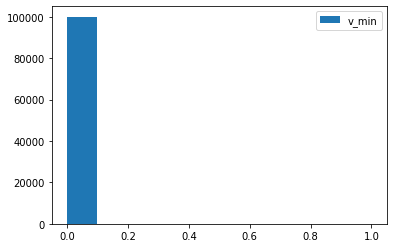

In [55]:
#se grafica el histograma para v_min
plt.hist([ c], 10,(0,1), label=['v_min'])
plt.legend(loc='upper right')

(c) Usando (b), grafique las estimaciones para $P\left[|v-\mu|>\epsilon\right]$ como una función de $\epsilon$, junto con el límite de Hoeffding, $2e^{-2\epsilon^{2}N}$ (en el mismo gráfico). 

### SOLUCIÓN:

Dado un $\epsilon$, para estimar $P\left[|v_1-\mu|>\epsilon\right]$ podemos contar el numero de veces que se cumple $|v_1-\mu|>\epsilon$ y dividirlo por el total de veces que se repitió el experimento ($100000$). De igual forma para las otras dos probabilidades. $N=10$ ya que es el tamaño de la muestra, que este caso se viene dada por el numero de lanzadas de las monedas $$.Esta idea se implementa en el siguiente codigo.

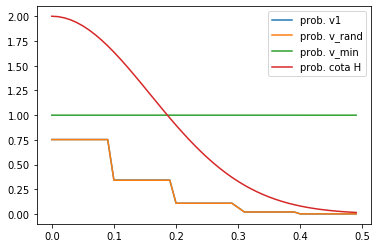

In [141]:
import math
# se crea un vector con valores de epsilon para el dominio de las graficas
valEps=np.arange(0,0.5,0.01)

#se crea la funcion de probabilidad
def fun_prob(e,v,numExperimento):
    vaux1=np.array(v)
    
    vaux2=np.abs(vaux1-0.5)
    
    prob=np.sum(vaux2 > e)/numExperimento
    return prob
# se crea la funcion para la cota de  Hoeffding
def cotaH(e,numExperimento):
    return 2*math.exp(-2*numExperimento*e**2)

#se crean los vectores a braficar
prob_v1=[]
prob_vrand=[]
prob_vmin=[]
cotas_H=[]

for i in valEps:
    prob_v1.append(fun_prob(i,his_v1,numExperimento))
    prob_vrand.append(fun_prob(i,his_vrand,numExperimento))
    prob_vmin.append(fun_prob(i,his_vmin,numExperimento))
    cotas_H.append(cotaH(i,numLanzamientos))

#se grafica
plt.plot(valEps,prob_v1, label="prob. v1")
plt.plot(valEps,prob_vrand, label="prob. v_rand")
plt.plot(valEps,prob_vmin, label="prob. v_min")
plt.plot(valEps,cotas_H, label="prob. cota H")
plt.legend(loc='upper right')

(d) ¿Qué monedas obedecen a la cota de Hoeffding y cuáles no? Explicar por qué.

### SOLUCIÓN:

La moneda c_1 y las monedas c_rand obedecen a a cota de Hoeffding y la moneda c_min no lo hace. Recoredemos cómo fue introducida esta cota. Supongamos que tenemos un contenedor lleno de pelotas verdes y rojas, la probabilidad de sacar una pelota roja es $\mu$. Si tomamos una muestra de tamaño $N$ y si a esa muestra le calculamos la fracción de pelotas rojas $v$, entonces la cota de Hoeffding nos dice qué tan probable es que $v$ se desvíe de $\mu$ (note que el contenedor con pelotas esta fijo, no se elije déspues de extraer las muestras, al hacerlo de esta manera estamos garantizando que la muestra es aleatoria). Aquí cada moneda representa un contenedor de pelotas, el número de veces que son lanzadas es el tamaño de la muestra y la fracción de caras representa la fracción de pelotas rojas. En cada experimento fijamos los contenedores que representa las monedas c_1 y c_rand antes de tomar las muestras de ellas, lo que garantiza que éstas son aleatorias. Por el contrario el contenedor que representa c_min es un contenedor que depende de la muestra (la que tenga menor fracción de caras rojas), lo que hace que la muestra ya no sea aleatoria y por tanto no funcione la cota de Hoeffding.

En general la cota de Hoeffding es valida cuando el contenedor, es decir la hipótesis en el problema de aprendizaje, ha sido fijado antes de tomar las muestras. 

(e) Relacione la parte (d) con los múltiples contenedores en la siguiente figura. 


<img src="imagenes/contenedores.PNG"
 width="450" height = "450">
 
### SOLUCIÓN:
Cada contenedor representa una hipótesis $h$. En el problema de aprendizaje queremos muestrear las hipotesis y elegir la que más nos convenga. Esto es similar a elegir c_min; pero está claro que con este procedimiento la cota de Hoeffding no nos funciona. 

### EJERCICIO 6 (Ejercicio 1.11 del libro)

Se nos proporciona un conjunto de datos D de 25 ejemplos de entrenamiento de una función objetivo desconocida $f:X\to Y$, donde $X=R$ y $y=\{—1, +1\}$. Para aprender $f$, usamos un conjunto de hipótesis simple $H=\{h_{1},h_{2}\}$ donde $h_{1}$ es la función constante $+1$ y $h_{2}$ es la constante $—1$.

Consideramos dos algoritmos de aprendizaje. S (inteligente) y C (loco). S elige la hipótesis que más concuerda con D y C elige la hipótesis contraria. Veamos cómo funcionan estos algoritmos a partir de la muestra desde los puntos de vista determinista y probabilístico. Suponga que desde el punto de vista probabilística que hay una distribución de probabilidad en $X$, y sea $P\left[f(x)=+1\right]=p$.

(a) ¿Puede S producir una hipótesis que esté garantizada para funcionar mejor que una hipótesis elegida aleatoriamente en cualquier punto fuera de D?

### SOLUCIÓN:

S elige la hipótesis que más concuerda con D. Por ejemplo si $f$ envía a la mayoría de puntos de D en $-1$ entonces S eligiría $h_{2}$; Pero si $p=0.9$ entonces la elegida aleatoriamente tendría chance del $50\%$ de elegír $h_{1}$ y acertar más que la hipótesis elegida por S, o elegir $h_{2}$, támbien con un chance del  $50\%$, y acertar igual que la hipótesis de S. Luego la hipótesis de S no garantiza que funcione mejor que una hipótesis elegida al azar, fuera de D.  

(b) Suponga para el resto del ejercicio que todos los ejemplos en D tienen a $y_{n}=+1$. ¿Es posible que la hipótesis que produce C resulte ser mejor que la hipótesis que produce S?

### SOLUCIÓN:

Si. En este caso S elegirá $h_{1}$ y C la contraria, es decir $h_{2}$ si suponemos que $f$ envía a todos los puntos fuera de D en $-1$ y el cardinal de $X>>25$ entonces la hipótesis de C acertaría mucho más que la de D.

(c) Si $P\left[f(x)=+1\right]=p=0.9$, ¿cuál es la probabilidad de que S produzca una mejor hiótesis que C?

### SOLUCIÓN:

S elige a $h_{1}$ y C elige $h_{2}$ que envian todos los puntos a $+1$ y $-1$, respectivamente. Como $p=0.9$ quiere decir que dado un punto en $X$, $f$ lo envía a $+1$ con una probabilidad del $0.9$, ese mismo punto $h_{1}$ lo envía a $+1$ con una probabilidad de $1$ y  $h_{2}$ lo envía a $-1$ con una probabilidad tambien de $1$. Así para todos los puntos. Luego, $h_{1}$ asierta con una probabilidad del $0.9$ y $h_{2}$ con una de $0.1$. Por tanto S produce una mejor hipótesis qeu C con una probabilidad de $0.9$.

(d) ¿Existe algún valor de $p$ para el que sea más probable que C produzca una hipótesis mejor que S?

### SOLUCIÓN:

Si. si $p<0.5$ entonces $h_{2}$, que es elegida por C, va tener una probabilidad mayor a $0.5$ de coincidir con $f$. Mientras que la elegida por S, $h_{1}$, va a tener una probabilidad menor a $0.5$ de coincidir con $f$.